Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

### Dataset Import

In [3]:
#drive.mount('/content/drive')

In [4]:
#data_dir_train = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Dataset/Train")
#data_dir_test = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/Dataset/Test")

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of thre train and test dataset
data_dir_train = pathlib.Path(r"C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train")
data_dir_test = pathlib.Path(r"C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Test")

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="training",
                                                               seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, validation_split=0.2, subset="validation",
                                                             seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
class_names = train_data.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

In [11]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
df_dict_org = dict(zip(path_list, lesion_list))
org_data = pd.DataFrame(list(df_dict_org.items()),columns = ['Path','Label'])
org_data

,Path,Label
0,C:\Malware\Ups\Deep Learning\Assignments\Submi...,actinic keratosis
1,C:\Malware\Ups\Deep Learning\Assignments\Submi...,actinic keratosis
2,C:\Malware\Ups\Deep Learning\Assignments\Submi...,actinic keratosis
3,C:\Malware\Ups\Deep Learning\Assignments\Submi...,actinic keratosis
4,C:\Malware\Ups\Deep Learning\Assignments\Submi...,actinic keratosis
...,...,...
2234,C:\Malware\Ups\Deep Learning\Assignments\Submi...,vascular lesion
2235,C:\Malware\Ups\Deep Learning\Assignments\Submi...,vascular lesion
2236,C:\Malware\Ups\Deep Learning\Assignments\Submi...,vascular lesion
2237,C:\Malware\Ups\Deep Learning\Assignments\Submi...,vascular lesion


In [12]:
counts = []
fol_name = []

for folders in os.listdir (data_dir_train):
    counts.append (len ([files for files in os.listdir (os.path.join (data_dir_train, folders))]))
    fol_name.append (folders)
class_dist = pd.DataFrame (zip (fol_name, counts), columns = ["ClassName", "Images"])

<Axes: xlabel='Images', ylabel='ClassName'>

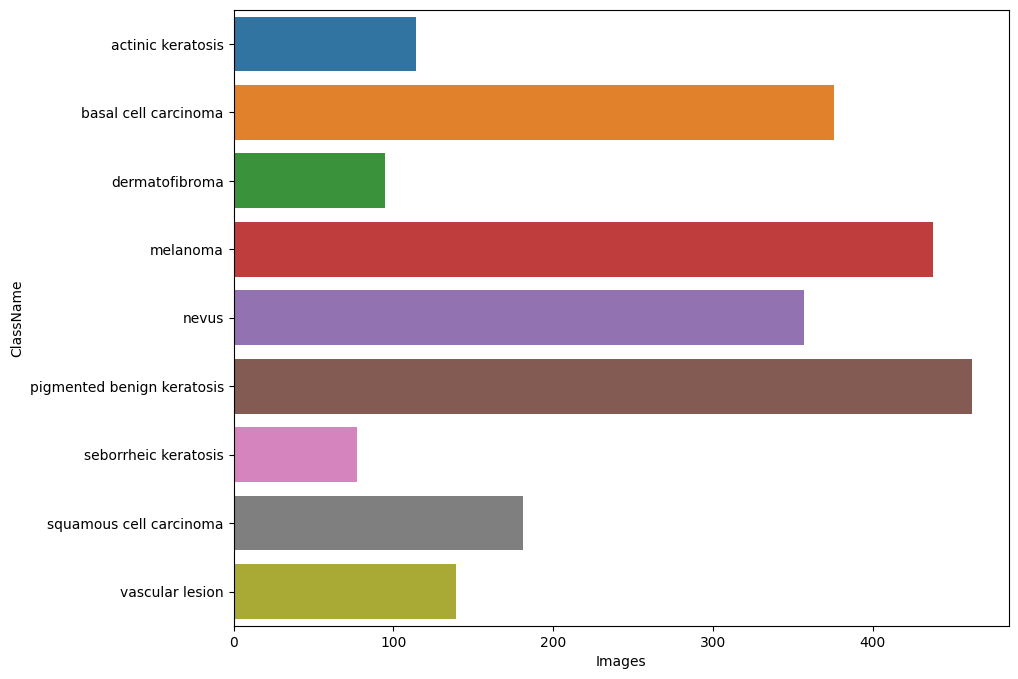

In [13]:
plt.figure(figsize = (10, 8))
sns.barplot (x="Images", y="ClassName", data = class_dist)

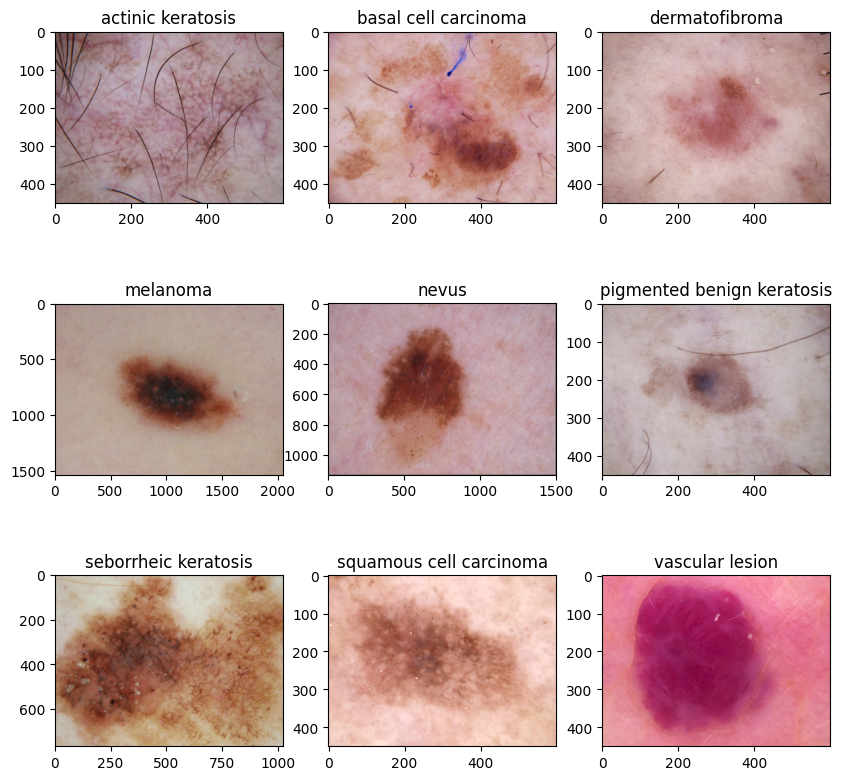

In [14]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Normalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

class_no = 9

In [17]:
model = Sequential ( [layers.experimental.preprocessing.Rescaling (1./ 255, input_shape= (img_height, img_width, 3))] )

model.add (Conv2D (filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (180, 180, 32)))
model.add (Conv2D (filters = 32, kernel_size = (5, 5), padding="Same", activation = "relu"))
model.add (MaxPool2D (pool_size=(2, 2)))

model.add (Conv2D (filters = 32, kernel_size = (5, 5), padding="Same", activation = "relu"))
model.add (MaxPool2D (pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add (Dropout (0.25))
model.add (Flatten())
model.add (Dense (class_no, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [18]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy (from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

### Train the model against base data

In [20]:
epochs = 20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/20


c:\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 150s 3s/step - loss: 2.0509 - accuracy: 0.1998 - val_loss: 2.0330 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 150s 3s/step - loss: 1.9917 - accuracy: 0.2065 - val_loss: 2.0155 - val_accuracy: 0.2170
Epoch 3/20
56/56 [==============================] - 146s 3s/step - loss: 2.0552 - accuracy: 0.1998 - val_loss: 2.0239 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 142s 3s/step - loss: 2.0235 - accuracy: 0.1992 - val_loss: 2.0363 - val_accuracy: 0.1902
Epoch 5/20
56/56 [==============================] - 143s 3s/step - loss: 2.0238 - accuracy: 0.1931 - val_loss: 2.0243 - val_accuracy: 0.1924
Epoch 6/20
56/56 [==============================] - 141s 3s/step - loss: 2.0160 - accuracy: 0.1936 - val_loss: 2.0253 - val_accuracy: 0.2125
Epoch 7/20
56/56 [==============================] - 157s 3s/step - loss: 1.9907 - accuracy: 0.2483 - val_loss: 2.0347 - val_accuracy: 0.2103
Epoch 8/20
56/56 [======

### Visualizing training results

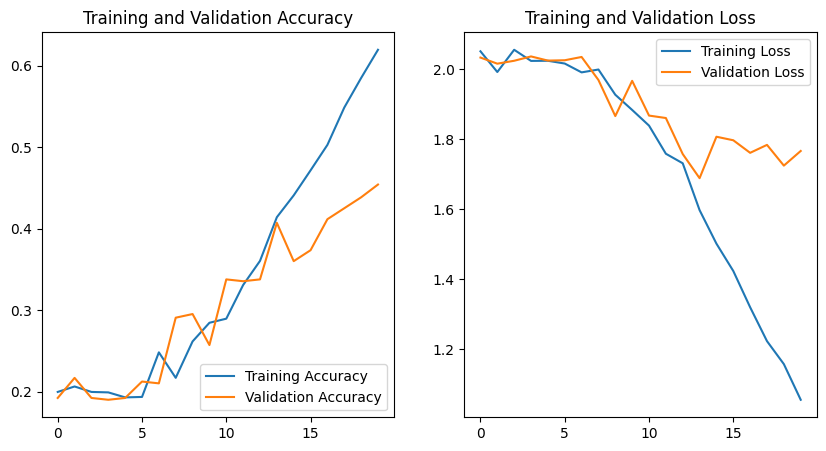

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
loss, accuracy = model.evaluate(train_data, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_data, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 4s 305ms/step - loss: 1.7664 - accuracy: 0.4541
Accuracy:  0.6802455186843872
Validation Accuracy:  0.45413869619369507
Loss:  0.9457384943962097
Validation Loss 1.766356348991394


### Observation from base model

*   Model seems to be overfit, seeing the difference in loss function in both training and test dataset on above 10the epoch
*   Accuracy is also between 65-70%

### Data Augmentation

In [23]:
aug_data = keras.Sequential ( [layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
                             layers.experimental.preprocessing.RandomRotation (0.2, fill_mode='reflect'),
                              layers.experimental.preprocessing.RandomZoom (height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode="reflect")])

#### Visualizing the augmentation strategy

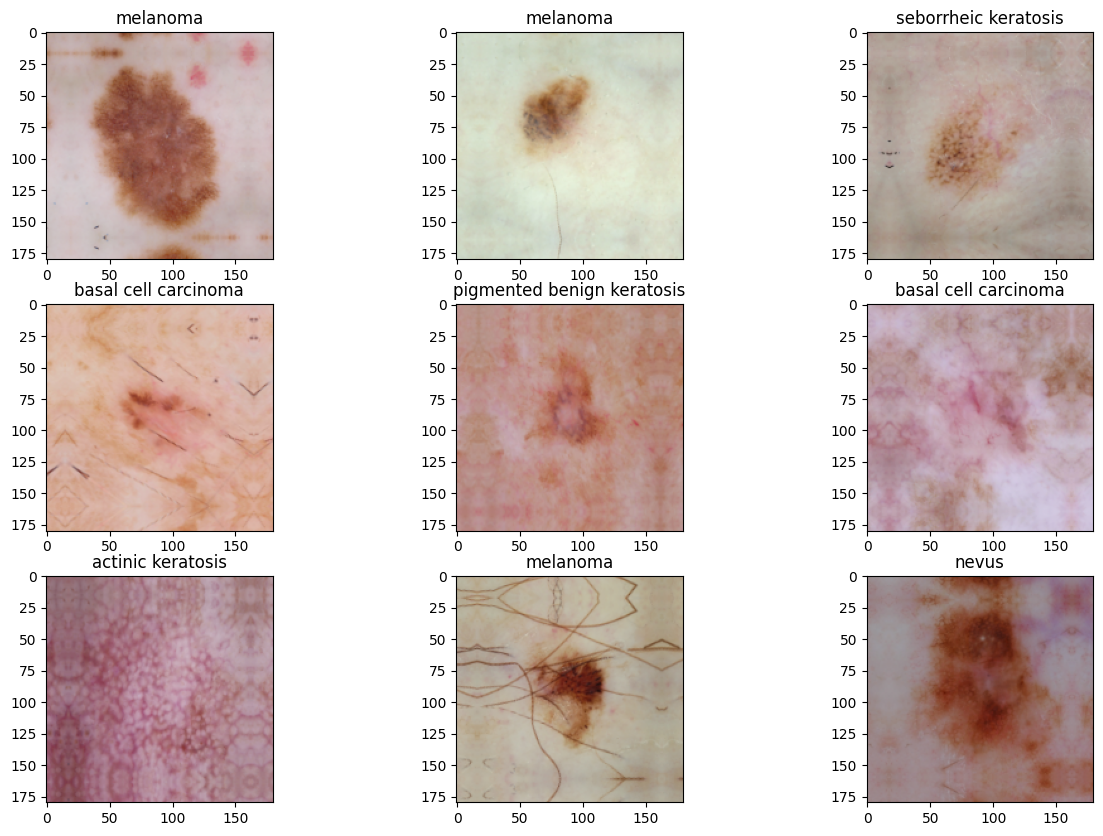

In [24]:
plt.figure (figsize=(15, 10))
for img, label in train_data.take(1):
  for i in range (9):
    data_aug = aug_data(img)
    ax = plt.subplot (3, 3, i+1)
    plt.imshow (data_aug[i].numpy().astype("uint8"))
    plt.title (class_names[label[i]])

### Create the model with augmented data


In [25]:
model = Sequential ( [aug_data, layers.experimental.preprocessing.Rescaling (1./ 255, input_shape= (img_height, img_width, 3))] )

model.add (Conv2D (filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (180, 180, 32)))
model.add (Conv2D (filters = 32, kernel_size = (5, 5), padding="Same", activation = "relu"))
model.add (MaxPool2D (pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add (Dropout (0.25))
model.add (Flatten())
model.add (Dense (class_no, activation = "softmax"))

### Compiling the model

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 64)        51264     
                                                      

### Training the model against augmented data

In [28]:
epochs=20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 155s 3s/step - loss: 1.9965 - accuracy: 0.2667 - val_loss: 1.9164 - val_accuracy: 0.2729
Epoch 2/20
56/56 [==============================] - 163s 3s/step - loss: 1.8048 - accuracy: 0.3449 - val_loss: 1.7235 - val_accuracy: 0.3870
Epoch 3/20
56/56 [==============================] - 157s 3s/step - loss: 1.6549 - accuracy: 0.3951 - val_loss: 1.6498 - val_accuracy: 0.3960
Epoch 4/20
56/56 [==============================] - 158s 3s/step - loss: 1.6781 - accuracy: 0.3956 - val_loss: 1.6380 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 155s 3s/step - loss: 1.5459 - accuracy: 0.4487 - val_loss: 1.5400 - val_accuracy: 0.4519
Epoch 6/20
56/56 [==============================] - 168s 3s/step - loss: 1.5182 - accuracy: 0.4660 - val_loss: 1.5992 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 192s 3s/step - loss: 1.5138 - accuracy: 0.4665 - val_loss: 1.4581 - val_accuracy: 0.4922
Epoch 8/20
56/56 [======

### Visualizing the results

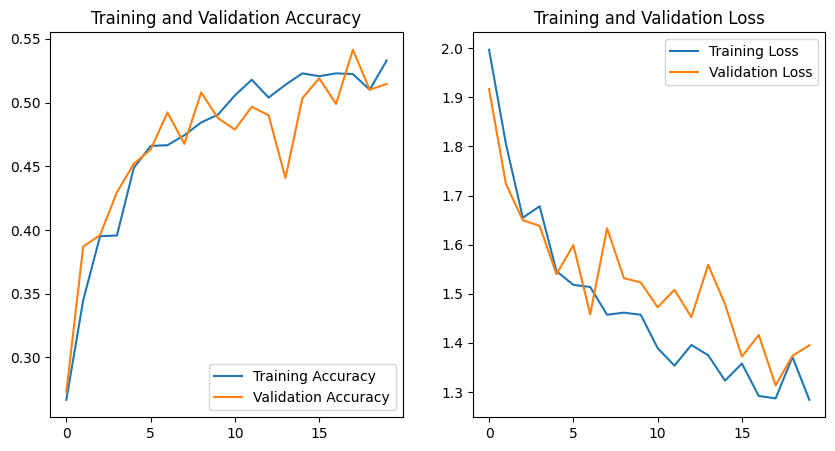

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation:

*   There are not much difference in accuracy but the overfitting problem were resolved by data augmentation



### Class Distribution

<Axes: xlabel='Images', ylabel='ClassName'>

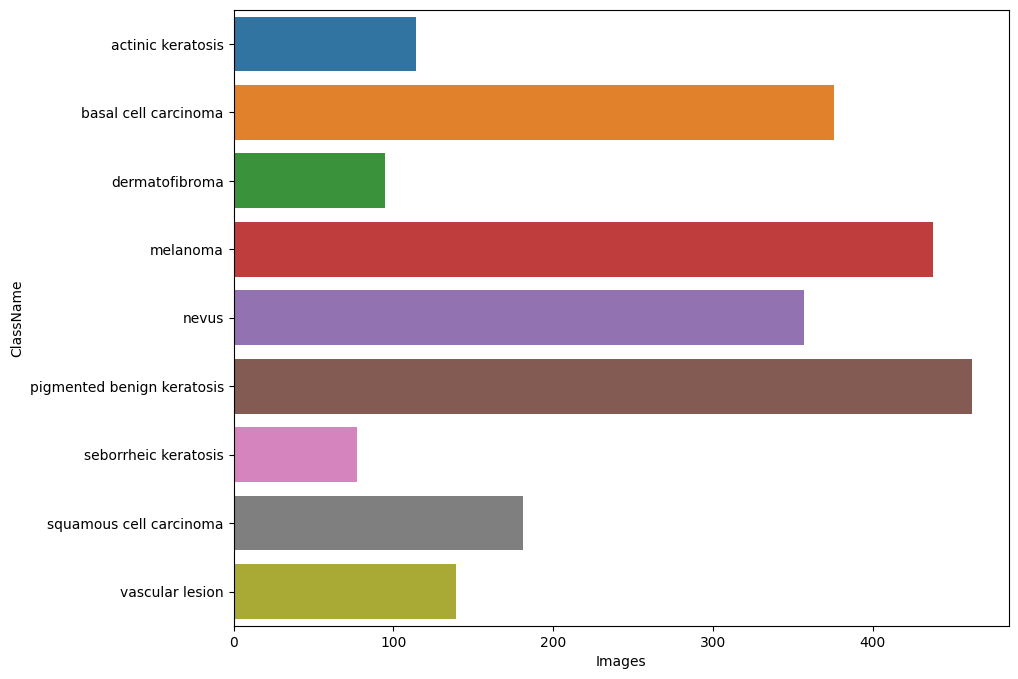

In [30]:
#we have already visualized class name distribution in class_dist
plt.figure(figsize = (10, 8))
sns.barplot (x="Images", y="ClassName", data = class_dist)

### Observation:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?

<li>1: seborrheic keratosis class has the least no of sampels
<li>2: (melanoma, pigmented benign keratosis) and (actinic keratosis, dermatofibroma) have the proportionate no of samples




### Class imbalance

In [31]:
!pip install Augmentor

  Obtaining dependency information for tqdm>=4.9.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
path_to_training_dataset=r"C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x192875A3D10>: 100%|██████████| 500/500 [00:01<00:00, 276.62 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x192812DC250>: 100%|██████████| 500/500 [00:01<00:00, 256.42 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x192EFCF4410>: 100%|██████████| 500/500 [00:01<00:00, 258.64 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x192F06DD3D0>: 100%|██████████| 500/500 [00:09<00:00, 52.96 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1928131BE50>: 100%|██████████| 500/500 [00:08<00:00, 59.23 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x192F0881E10>: 100%|██████████| 500/500 [00:02<00:00, 236.85 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x192F63A7810>: 100%|██████████| 500/500 [00:04<00:00, 103.49 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x192875E11D0>: 100%|██████████| 500/500 [00:02<00:00, 217.61 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train\\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1928846DC50>: 100%|██████████| 500/500 [00:02<00:00, 233.94 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
from glob import glob

In [41]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:5]

['C:\\Malware\\Ups\\Deep Learning\\Assignments\\Submission\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1646a841-6552-4e99-8d83-db69cec095b3.jpg',
 'C:\\Malware\\Ups\\Deep Learning\\Assignments\\Submission\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_641fdb60-0497-4973-babc-ea657e8f52e0.jpg',
 'C:\\Malware\\Ups\\Deep Learning\\Assignments\\Submission\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_89ada550-d9a8-4cad-b0dc-f7156adb384e.jpg',
 'C:\\Malware\\Ups\\Deep Learning\\Assignments\\Submission\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_a01b2952-ff10-4ba6-87e7-9ccb181be594.jpg',
 'C:\\Malware\\Ups\\Deep Learning\\Assignments\\Submission\\Dataset\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ff6d3151-5892-4daa-95d8-0157cb3c4330.jpg']

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [43]:
df_dict_new = dict(zip(path_list, lesion_list_new))

In [48]:
df2 = pd.DataFrame(list(df_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat ([org_data, df2])

In [49]:
df2['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [50]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [53]:
data_dir_train=r"C:\Malware\Ups\Deep Learning\Assignments\Submission\Dataset\Train"
train_data_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [54]:
val_data_new = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model

In [55]:
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))

])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(class_no, activation = "softmax"))

#### Compile your model

In [56]:
model.compile (optimizer="adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

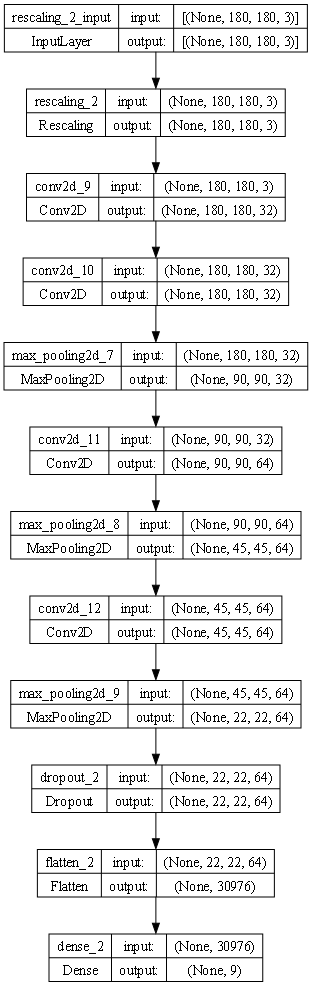

In [57]:
tf.keras.utils.plot_model(model = model , rankdir="TB", dpi=72, show_shapes=True)

#### Train your model

In [58]:
epochs = 30

history = model.fit(
  train_data_new,
  validation_data=val_data_new,
  epochs=epochs
)

Epoch 1/30


c:\Python311\Lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 522s 3s/step - loss: 2.0784 - accuracy: 0.2025 - val_loss: 1.7557 - val_accuracy: 0.3274
Epoch 2/30
169/169 [==============================] - 486s 3s/step - loss: 1.7171 - accuracy: 0.3440 - val_loss: 1.5859 - val_accuracy: 0.4061
Epoch 3/30
169/169 [==============================] - 512s 3s/step - loss: 1.5712 - accuracy: 0.4086 - val_loss: 1.4248 - val_accuracy: 0.4647
Epoch 4/30
169/169 [==============================] - 507s 3s/step - loss: 1.4013 - accuracy: 0.4744 - val_loss: 1.4145 - val_accuracy: 0.4744
Epoch 5/30
169/169 [==============================] - 523s 3s/step - loss: 1.2488 - accuracy: 0.5319 - val_loss: 1.1841 - val_accuracy: 0.5523
Epoch 6/30
169/169 [==============================] - 534s 3s/step - loss: 1.1105 - accuracy: 0.5849 - val_loss: 1.1494 - val_accuracy: 0.5865
Epoch 7/30
169/169 [==============================] - 527s 3s/step - loss: 1.0030 - accuracy: 0.6328 - val_loss: 1.0599 - val_accuracy: 0.6013
Epoch 8/30

#### Visualize the model results

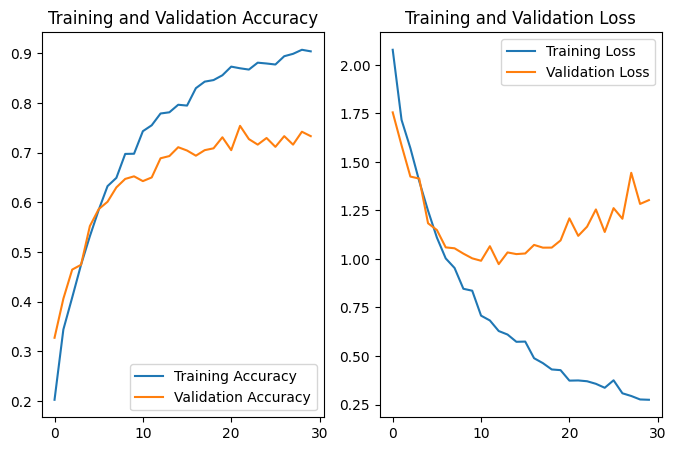

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Did you get rid of underfitting/overfitting? Did class rebalance help?


*   Accuracy on training and test dataset increased after using augmentor
*   Rebalance worked here to get rid of Overfitting.





In [73]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Test set prediction

1/1 [==============================] - 0s 45ms/step
Actual Class melanoma
Predictive Class melanoma


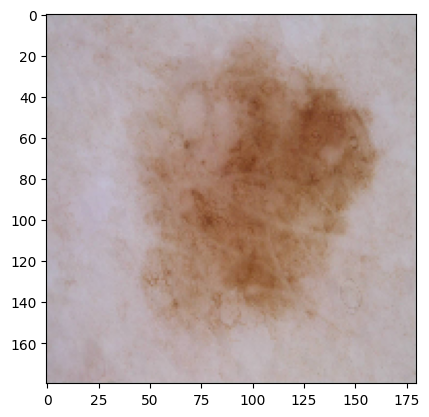

In [76]:
from tensorflow.keras.preprocessing.image import load_img

Test_image_path = os.path.join(data_dir_test, class_names[3], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[3] +'\n'+ "Predictive Class "+pred_class )